# DMML exam: 2023-02-22

The dataset contains 11 clinical features that can be used for predicting heart disease events.

The target, binary, attribute is reported in the column **HeartDisease**:
- 1: Heart disease
- 0: Normal

# Instructions summary
1. Import the *heart.csv* dataset
2. Perform an **exploratory analysis**
    - Report and discuss the results of the analysis
3. Perform the required data preprocessing steps:
    - Obtain a numeric representation of the categorical variables
4. Carry out a **classification analysis** aimed at predicting **HeartDisease** considering the following setting
    - Apply a 10-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following, in terms of **accuracy score**:
        - Logistic Regression classifier (default parameters) after standard scaling;
        - Logistic Regression classifier (default parameters) after standard scaling and feature selection targeted at halving the number of features;
    - Apply the **Wilcoxon signed-rank test** to test the null hypothesis that the two related paired samples (distributions of accuracy score, obtained with and without feature selection) come from the same distribution;
    - Report and discuss the results using a dedicated markdown cell;
5. Perform inference on an unseen record:
    - **Train on the whole dataset** the Logistic Regression classifier after standard scaling, **considering only the following variables**:
```python
['Age', 'RestingBP', 'Cholesterol', 'MaxHR' 'Oldpeak']
```    
    - Perform inference on the following record:
```python
unseen_record = pd.DataFrame({'Cholesterol':120,
                           'Age':47, 
                           'MaxHR':86, 
                           'Oldpeak':2.1,
                           'RestingBP':125, 
                          },index = [1])
```    

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment (**be sure to upload the files**, after attaching them)
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
     
# Code of conduct
- You can consult the course material (notebooks and slides)
- You can consult the official documentation of the libraries
- Any form of information leakage between candidates is not allowed: if this is ascertained, exam failure is automatic.

# 1. Import the *heart.csv* dataset

In [1]:
# TODO
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# 2. Perform an **exploratory analysis**
- Report and discuss the results of the analysis



In [2]:
# TODO
df.shape

(918, 12)

In [3]:
df.head(5).T

,0,1,2,3,4
Age,40,49,37,48,54
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingBP,140,160,130,138,150
Cholesterol,289,180,283,214,195
FastingBS,0,0,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal
MaxHR,172,156,98,108,122
ExerciseAngina,N,N,N,Y,N
Oldpeak,0.0,1.0,0.0,1.5,0.0


In [4]:
df.tail(5).T

,913,914,915,916,917
Age,45,68,57,57,38
Sex,M,M,M,F,M
ChestPainType,TA,ASY,ASY,ATA,NAP
RestingBP,110,144,130,130,138
Cholesterol,264,193,131,236,175
FastingBS,0,1,0,0,0
RestingECG,Normal,Normal,Normal,LVH,Normal
MaxHR,132,141,115,174,173
ExerciseAngina,N,N,Y,N,N
Oldpeak,1.2,3.4,1.2,0.0,0.0


In [14]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [8]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


I obtained the statistical parameters for all the object-type values (string, mixed-type...). We have 5 different attributes for which the values are categorical, while the remaining ones are numerical data.

In [9]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


I get NaN values in the categorical columns because the operations are not applicable.

In [11]:
df.isna().values.any()

False

In [12]:
df.isna().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [13]:
df.isna().sum(axis=0)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values in the dataset.

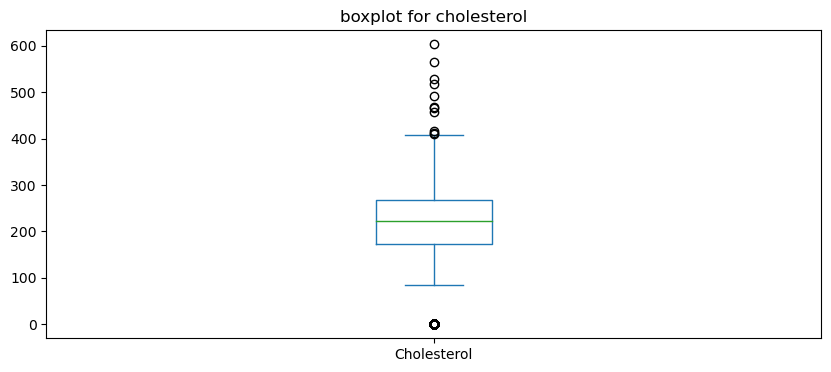

In [69]:
df.plot(kind='box', column='Cholesterol', figsize=(10,4), title='boxplot for cholesterol')
plt.show()

In [16]:
df['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

I would remove 603 which looks like an outlier by checking the mean and the standard deviation of the cholesterol values distribution.

In [ ]:
df['z-score']=(df[])

In [17]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


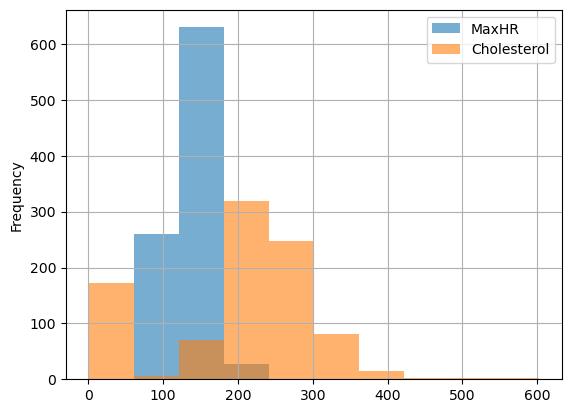

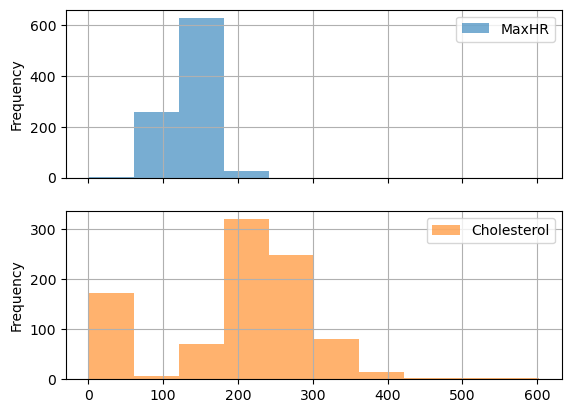

In [21]:
df[['MaxHR', 'Cholesterol']].plot(kind='hist',
                                grid=True,
                                alpha=0.6)
plt.show()

df[['MaxHR', 'Cholesterol']].plot(kind='hist',
                                grid=True,
                                alpha=0.6,
                                subplots=True)
plt.show()

In [22]:
from scipy.stats import pearsonr

pearsonr(df.Cholesterol, df.MaxHR)

PearsonRResult(statistic=0.23579240300238558, pvalue=4.597229278319693e-13)

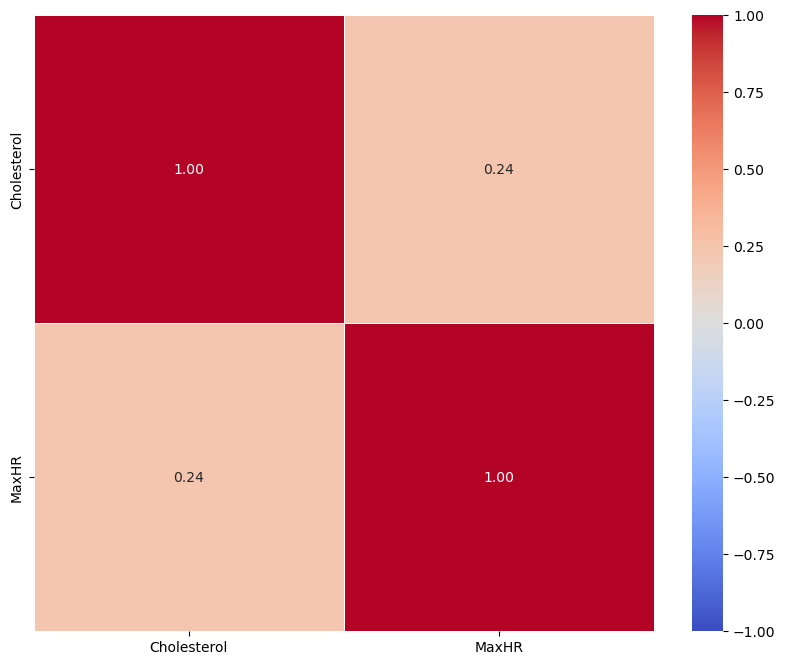

In [26]:
#SUBPLOTS WITH SEABORN--> use HEATMAP
f, ax=plt.subplots(figsize=(10,8))
sns.heatmap(df[['Cholesterol', 'MaxHR']].corr(),
           annot=True,
           linewidths=.5,
           fmt='.2f',
           ax=ax,
           vmin=-1,            #min value
           vmax=1,             #max value
           cmap='coolwarm')
plt.show()

In [45]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [48]:
numerical_data=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [49]:
numerical_data

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [52]:
nominal_data=list(set(df.columns)-set(numerical_data+['HeartDisease']))

In [53]:
nominal_data

['ExerciseAngina', 'RestingECG', 'ChestPainType', 'ST_Slope', 'Sex']

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

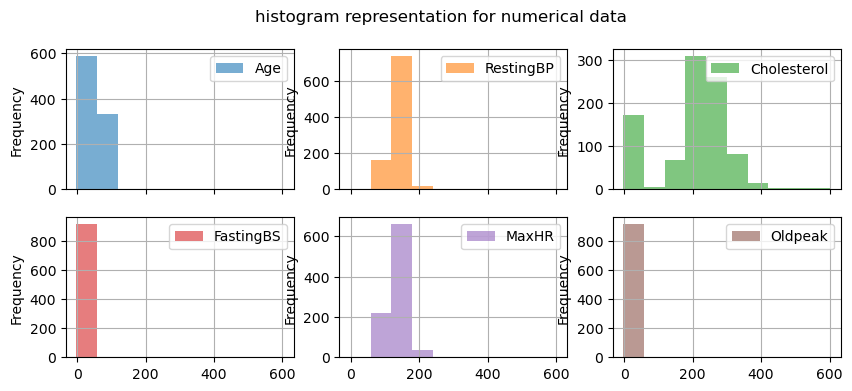

In [60]:
df[numerical_data].plot(kind='hist',
                       title='histogram representation for numerical data',
                       figsize=(10,4),
                       layout=(2,3),
                       grid=True,
                       alpha=0.6,
                       subplots=True)

Age               Axes(0.125,0.53;0.227941x0.35)
RestingBP      Axes(0.398529,0.53;0.227941x0.35)
Cholesterol    Axes(0.672059,0.53;0.227941x0.35)
FastingBS         Axes(0.125,0.11;0.227941x0.35)
MaxHR          Axes(0.398529,0.11;0.227941x0.35)
Oldpeak        Axes(0.672059,0.11;0.227941x0.35)
dtype: object

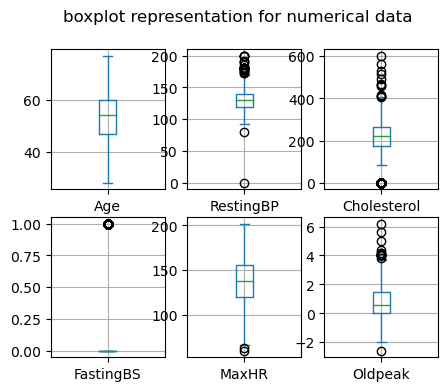

In [64]:
df[numerical_data].plot(kind='box',
                       title='boxplot representation for numerical data',
                       figsize=(5,4),
                       layout=(2,3),
                       grid=True,
                       subplots=True)

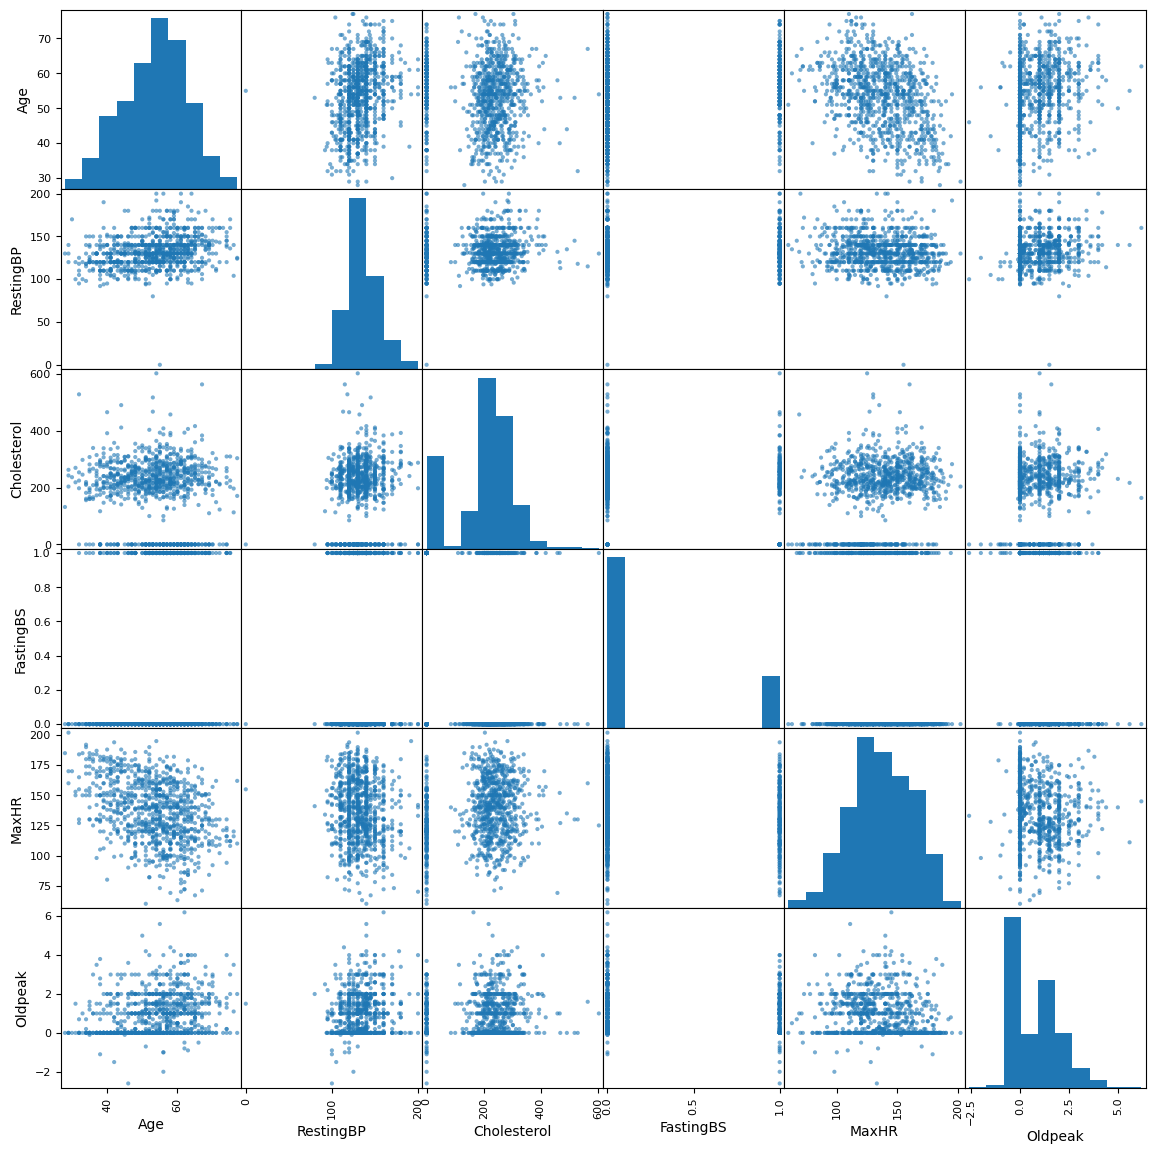

In [73]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[numerical_data],
              alpha=0.6,
              grid=True,
              figsize=(14,14),
              diagonal='hist')
plt.show()

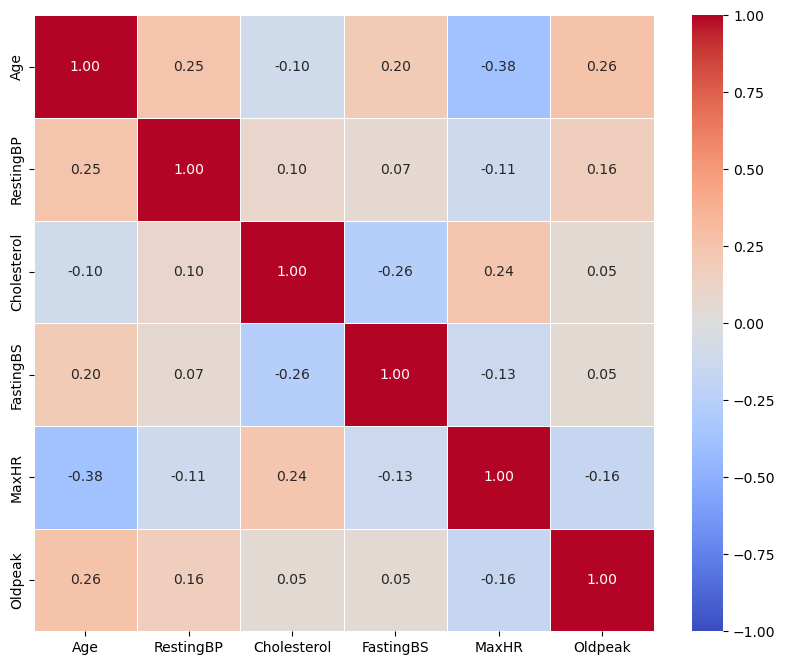

In [74]:
f, ax=plt.subplots(figsize=(10,8))
sns.heatmap(df[numerical_data].corr(),
           annot=True,
           linewidths=.5,
           fmt='.2f',
           ax=ax,
           vmin=-1,            #min value
           vmax=1,             #max value
           cmap='coolwarm')
plt.show()

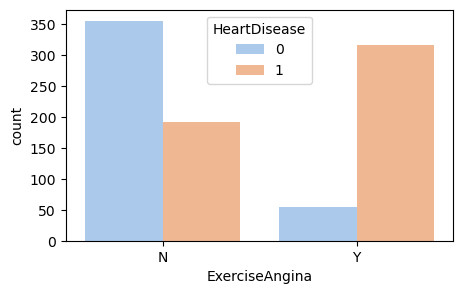

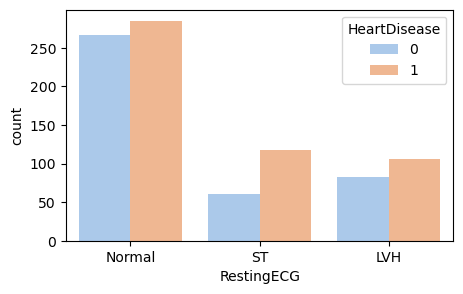

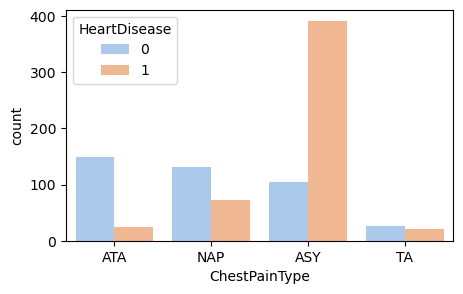

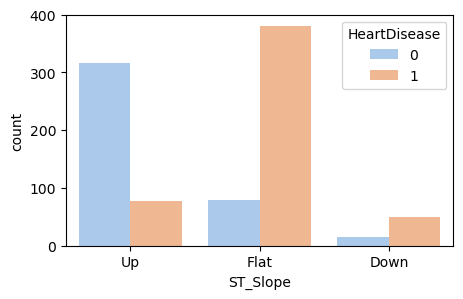

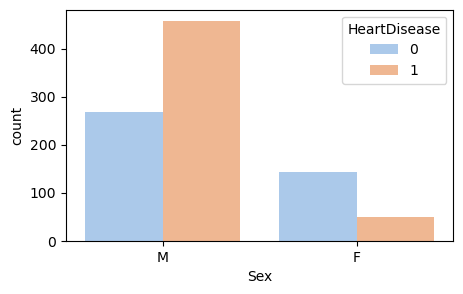

In [76]:
for col in nominal_data:
    plt.figure(figsize = (5,3))
    sns.countplot(x=col, data=df, hue = "HeartDisease", palette = "pastel")
    plt.show()

# 3. Perform the required data preprocessing steps:
- Obtain a numeric representation of the categorical variables


In [77]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [79]:
df[nominal_data]

,ExerciseAngina,RestingECG,ChestPainType,ST_Slope,Sex
0,N,Normal,ATA,Up,M
1,N,Normal,NAP,Flat,F
2,N,ST,ATA,Up,M
3,Y,Normal,ASY,Flat,F
4,N,Normal,NAP,Up,M
...,...,...,...,...,...
913,N,Normal,TA,Flat,M
914,N,Normal,ASY,Flat,M
915,Y,Normal,ASY,Flat,M
916,N,LVH,ATA,Flat,F


In [82]:
#either with dictionary and lambda function
#or with one hot encoder

x_t=df.drop(['HeartDisease'], axis=1)
y_t= df['HeartDisease']

col=['ChestPainType','ST_Slope','RestingECG']

In [84]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
encoded=enc.fit_transform(x_t[col]).toarray()
x_t1= pd.DataFrame(encoded, columns=enc.get_feature_names_out(col))

In [85]:
x_t= pd.concat([x_t, x_t1], axis=1)
x_t=x_t.drop(col, axis=1)
x_t

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,M,140,289,0,172,N,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,49,F,160,180,0,156,N,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,M,130,283,0,98,N,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,F,138,214,0,108,Y,1.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,54,M,150,195,0,122,N,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,110,264,0,132,N,1.2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,M,144,193,1,141,N,3.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,M,130,131,0,115,Y,1.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
916,57,F,130,236,0,174,N,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [86]:
diz_exercise={'N':0, 'Y':1}
diz_sex={'M':0, 'F':1}

In [88]:
x_t['ExerciseAngina']= x_t['ExerciseAngina'].apply(lambda x: diz_exercise[x])
x_t['Sex']= x_t['Sex'].apply(lambda x: diz_sex[x])

In [89]:
x_t

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,0,140,289,0,172,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,49,1,160,180,0,156,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,0,130,283,0,98,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,1,138,214,0,108,1,1.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,54,0,150,195,0,122,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,0,1.2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,0,144,193,1,141,0,3.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,0,130,131,0,115,1,1.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
916,57,1,130,236,0,174,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# 4. Carry out a **classification analysis** aimed at predicting **HeartDisease** considering the following setting
- Apply a 10-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following, in terms of **accuracy score**:
    - Logistic Regression classifier (default parameters) after standard scaling;
    - Logistic Regression classifier (default parameters) after standard scaling and feature selection targeted at halving the number of features;
- Apply the **Wilcoxon signed-rank test** to test the null hypothesis that the two related paired samples (distributions of accuracy score, obtained with and without feature selection) come from the same distribution;
- Report and discuss the results using a dedicated markdown cell;


In [90]:
# TODO
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import os
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
def eval_cross_validation(pipeline, X, y):
    list_df = []
    list_accuracy = []
    for train, val in skf.split(X, y):
        # fit and predict using pipeline
        X_tr = X.values[train]#9 k-1
        y_tr = y.values[train]
        X_val = X.values[val]#1
        y_val = y.values[val]
        pipeline.fit(X_tr,y_tr)
        y_pred = pipeline.predict(X_val)
        # compute classification report
        cr = classification_report(y_val, y_pred, output_dict = True, zero_division = np.nan)
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
        list_df.append(df)
    
    # compute average per-class metrics    
    df_concat = pd.concat(list_df)
    by_row_index = df_concat.groupby(df_concat.index)
    df_avg = by_row_index.mean().round(3)

    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)
    
    return df_avg, accuracy_avg

In [93]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, make_scorer, recall_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
lr = LogisticRegression(max_iter=1000)

accuracy 0.8583850931677018


,0,1,macro avg,weighted avg
f1-score,0.838,0.874,0.856,0.858
precision,0.854,0.863,0.859,0.859
recall,0.824,0.886,0.855,0.858
support,41.000,50.800,91.800,91.800


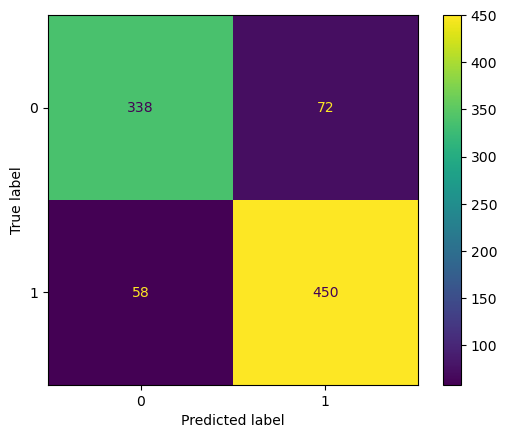

In [94]:
estimators = [('missing', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
              ('scaler',StandardScaler()),
              ('lf', LogisticRegression(max_iter = 1000) )]
pipe = Pipeline(estimators)
df_metrics, acc = eval_cross_validation(pipe, x_t, y_t)

print('accuracy',acc)
display(df_metrics)
y_pred = cross_val_predict(pipe, x_t, y_t, cv=skf)
ConfusionMatrixDisplay.from_predictions(y_t, y_pred)
plt.show()

In [95]:
a1=acc

In [96]:
lreg = cross_val_score(pipe, x_t, y_t, scoring = make_scorer(f1_score, pos_label=1), cv = skf)#RIVEDI AMMODO GRAZIE GUYA TI VOGLIO TANTO BENE CHE ADESSO FUNZIONA CIAO
lreg, lreg.mean()

(array([0.82828283, 0.92307692, 0.92156863, 0.86792453, 0.86792453,
        0.82242991, 0.88461538, 0.88235294, 0.82828283, 0.91089109]),
 0.8737349585140157)

In [97]:
estimators = [
    ('missing', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('scaler', StandardScaler()),
    ('fsel', SequentialFeatureSelector(lr, 
                                cv=StratifiedKFold(n_splits=10),
                                scoring='accuracy', 
                                direction='forward', 
                                n_features_to_select=4)),
    ('lf', lr)
]

accuracy 0.8322384137601528


,0,1,macro avg,weighted avg
f1-score,0.810,0.849,0.830,0.832
precision,0.823,0.843,0.833,0.834
recall,0.800,0.858,0.829,0.832
support,41.000,50.800,91.800,91.800


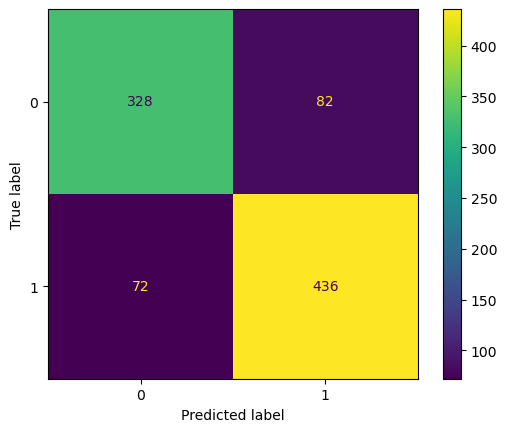

In [98]:
pipe = Pipeline(estimators)
df_metrics, acc = eval_cross_validation(pipe, x_t, y_t)

print('accuracy',acc)
display(df_metrics)
y_pred = cross_val_predict(pipe, x_t, y_t, cv=skf)
ConfusionMatrixDisplay.from_predictions(y_t, y_pred)
plt.show()

In [99]:
lrsel = cross_val_score(pipe, x_t, y_t, scoring = make_scorer(f1_score,pos_label=1), cv = skf)
lrsel, lrsel.mean()

(array([0.79569892, 0.83495146, 0.88235294, 0.90196078, 0.81553398,
        0.81481481, 0.90566038, 0.84615385, 0.83168317, 0.86538462]),
 0.849419490914318)

In [100]:
a2=acc

In [101]:
df_results = pd.DataFrame({'lreg': lreg, 'lrsel': lrsel})
df_results

,lreg,lrsel
0,0.828283,0.795699
1,0.923077,0.834951
2,0.921569,0.882353
3,0.867925,0.901961
4,0.867925,0.815534
5,0.822430,0.814815
6,0.884615,0.905660
7,0.882353,0.846154
8,0.828283,0.831683
9,0.910891,0.865385


Text(0, 0.5, 'HeartDisease')

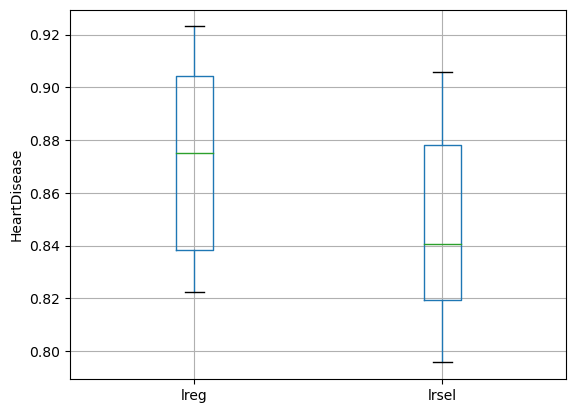

In [102]:
bplot = df_results.boxplot()
bplot.set_ylabel('HeartDisease')

In [103]:
from scipy.stats import wilcoxon

In [104]:
wilcoxon(df_results.lreg,df_results.lrsel)

WilcoxonResult(statistic=9.0, pvalue=0.064453125)

# 5. Perform inference on an unseen record:
- **Train on the whole dataset** the Logistic Regression classifier after standard scaling, **considering only the following variables**:
```python
['Cholesterol', 'Age', 'MaxHR', 'Oldpeak', 'RestingBP']
```    
- Perform inference on the following record:
```python
unseen_record = pd.DataFrame({'Cholesterol':120,
                           'Age':47, 
                           'MaxHR':86, 
                           'Oldpeak':2.1,
                           'RestingBP':125, 
                          },index = [1])

```    


In [105]:
# TODO
meaning=['Cholesterol', 'Age', 'MaxHR', 'Oldpeak', 'RestingBP']
colonne= list(x_t.columns)
c1 = list(set(colonne) - set(meaning))
print(c1)

['RestingECG_Normal', 'ChestPainType_NAP', 'ChestPainType_TA', 'Sex', 'RestingECG_LVH', 'ExerciseAngina', 'ChestPainType_ASY', 'ChestPainType_ATA', 'FastingBS', 'ST_Slope_Flat', 'ST_Slope_Up', 'RestingECG_ST', 'ST_Slope_Down']


In [106]:
df_prova = x_t.copy()

In [107]:
df_prova=df_prova.drop(c1,axis=1)

In [108]:
df_prova

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [109]:
test = pd.DataFrame({'Age':47,
                           'RestingBP':125, 
                           'Cholesterol':120,
                           'MaxHR':86,
                           'Oldpeak':2.1,
                          },index = [1])

In [110]:
estimators = [('missing', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
              ('scaler',StandardScaler()),
              ('lf', LogisticRegression(max_iter = 1000) )]
pipe = Pipeline(estimators)

In [111]:
pipe.fit(df_prova,y_t)
y_pred = pipe.predict(test)

In [112]:
print(y_pred)

[1]


# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment (**be sure to upload the files**, after attaching them)
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
